<a href="https://colab.research.google.com/github/Sescallupe/Foot_Ulcer_Segmentation_Challenge/blob/Daniel/Qualityplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**First we load the libraries**


1) Uninstall opencv 

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


2) Install opencv and load again

In [ ]:
!pip3 install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3) Download models

In [ ]:
!git clone https://github.com/Saafke/EDSR_Tensorflow.git

fatal: destination path 'EDSR_Tensorflow' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/Saafke/FSRCNN_Tensorflow.git

fatal: destination path 'FSRCNN_Tensorflow' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/fannymonori/TF-LapSRN.git

fatal: destination path 'TF-LapSRN' already exists and is not an empty directory.


4) Libraries to use

In [ ]:
import os, datetime, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

##Load images from drive

URL= *"YURDRIVE"_Foot_Ulcer_Segmentation_Challenge/DataBase/VRI/Data_segmentation_DFUS/coor_txt_test/crops_test*

In [ ]:
input_dir = "/content/drive/MyDrive/Foot_Ulcer_Segmentation_Challenge/DataBase/VRI/Data_segmentation_DFUS/coor_txt_test/crops_test"
m=glob.glob(input_dir + "/*.jpg")

In [ ]:
# Read image
ruta = m[0]
img = cv2.imread(ruta)
plt.imshow(img[:,:,::-1])
plt.title("{}".format(img.shape))
plt.show()



IndexError: ignored

##Evaluating with the methods

By method EDSR_x4

In [ ]:

sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/EDSR_Tensorflow/models/EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4) 
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.title('{}'.format(resized.shape))
plt.show()


AttributeError: ignored

By method FSRCNN_x3 este modelo se va a usar, pasas toda las imágenes del drive que te pase y guardas la imágenes 'result'

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/FSRCNN_Tensorflow/models/FSRCNN_x3.pb"
sr.readModel(path)
sr.setModel("fsrcnn",3)
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)
# OpenCV upscaled
#plt.imshow(resized[:,:,::-1])
#plt.title('{}'.format(resized.shape))
#plt.show()

AttributeError: ignored

By method LapSRN_x8

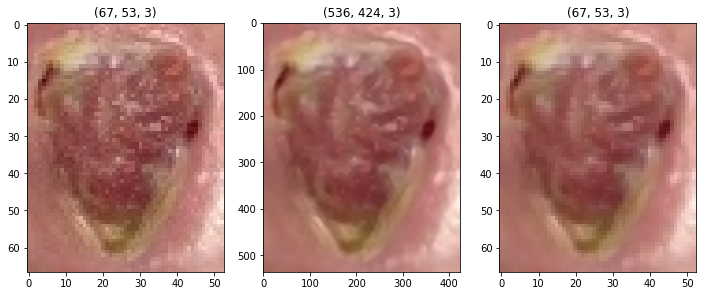

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/TF-LapSRN/export/LapSRN_x8.pb"
sr.readModel(path)
sr.setModel("lapsrn",8)
result = sr.upsample(img)
 

# Resized image
dim=(img.shape[1],img.shape[0])
resized = cv2.resize(result, dim, interpolation = cv2.INTER_AREA)
#resized = cv2.resize(img,dsize=None,fx=4,fy=4)

 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.title('{}'.format(img.shape))
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.title('{}'.format(result.shape))
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.title('{}'.format(resized.shape))
plt.show()